<a href="https://colab.research.google.com/github/renewable-energy-experiments/carbonfoorprint/blob/master/high_granularity_power_generation_iso_newengland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> US electricity generation by energy source ( price , co2 emission by grids)<center><h1> 
  High granularity Power generation ISO NewEngland  

# Table of Contents
* [1. DataSet Description](#section-one)
* [2. Import and Preprocessing](#section-two)
* [3. Filler and Filter](#section-three)
* [4. Daily Grpahs](#section-four)
* [5. Carbon Emission vs Fuel](#section-five)
* [6. Price vs Fuel](#section-six)
* [7. LMP Locational Marginal Pricing](#section-seven)

<a id="section-one"></a>
# 1. DataSet Description

Dataset is weekly reports from EDA for ISO-NE

<a id="section-two"></a>
# 2. Import & Preprocessing

Let's have a first look at the data. For the sake of simplicity we are only looking at data of plant 1 (power generation and weather). Data of power plant 2 can then be explored in a similar manner.

In [ ]:
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates 
xformatter = mdates.DateFormatter('%H:%M') # for time axis plots

# import plotly.offline as py
# py.init_notebook_mode(connected=True)

import sklearn
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import all available data 
# df = pd.read_csv("../input/us-electricity-by-energy-source-in-spring/930-data-export.csv")

df = pd.read_csv("../input/nyiso-april-2ndweek/fuelmixgraph_Newengland_6_7_jul_2020.csv")
df2 = pd.read_csv("../input/nyiso-april-2ndweek/fuelmixgraph_Newengland_8_9_jul_2020.csv")
df3 = pd.read_csv("../input/nyiso-april-2ndweek/fuelmixgraph_Newengland_10_11_jul_2020.csv")

In [ ]:
df= df.append(df2)
df = df.append(df3)
len(df) 

881

In [ ]:
# Region = df['Region Code'].head(1).item()
# Region

Region="NewEngland"

In [ ]:
df.head()

,BeginDate,NaturalGas,Nuclear,Hydro,Coal,Oil,Renewables,Wood,Refuse,Wind,LandfillGas,Solar,Other
0,07/05/2020 21:07,6428,3328,407,0,undefined,627,222,333,58,2,12,undefined
1,07/05/2020 21:12,6312,3329,409,undefined,undefined,626,221,338,53,2,12,undefined
2,07/05/2020 21:21,6041,3330,409,undefined,undefined,617,222,335,46,2,12,0
3,07/05/2020 21:34,6164,3328,407,2,undefined,592,219,333,26,2,12,4
4,07/05/2020 21:50,6047,3331,407,1,undefined,600,221,333,32,2,12,1


<a id="section-three"></a>
## 3. Filter and filler 

In [ ]:
print(df.dtypes)

BeginDate      object
NaturalGas      int64
Nuclear         int64
Hydro           int64
Coal           object
Oil            object
Renewables      int64
Wood            int64
Refuse          int64
Wind            int64
LandfillGas    object
Solar          object
Other          object
dtype: object


Change datatype

In [ ]:
df['Solar'] = pd.to_numeric(df['Solar'], errors='coerce').fillna(0)
df['Coal'] = pd.to_numeric(df['Coal'], errors='coerce').fillna(0)
df['Oil'] = pd.to_numeric(df['Oil'], errors='coerce').fillna(0)
print(df.dtypes)

BeginDate       object
NaturalGas       int64
Nuclear          int64
Hydro            int64
Coal           float64
Oil            float64
Renewables       int64
Wood             int64
Refuse           int64
Wind             int64
LandfillGas     object
Solar          float64
Other           object
dtype: object


In [ ]:
# check find and remove duplicates - doesnt work 

# boolean = df["BeginDate"].is_unique  
# print("Is Unique " , boolean, df.size)

# if(not boolean):
#     duplicate = df[df.duplicated()]
#     df = df.drop(duplicate.index)

# boolean = df["BeginDate"].is_unique  
# print("Now Is Unique " , boolean, df.size)

## Timestamp  different utility Graphs  

In [ ]:
df['Timestamp'] = pd.to_datetime(df['BeginDate'], format = '%m/%d/%Y %H:%M')
               
# adding separate time and date columns
df["DATE"] = pd.to_datetime(df["Timestamp"]).dt.date # add new column with date
# df["TIME"] = pd.to_datetime(df["Timestamp"]).dt.time # add new column with time

# # add hours and minutes for ml models
# df['HOURS'] = pd.to_datetime(df['TIME'],format='%H:%M').dt.hour
# df['MINUTES'] = pd.to_datetime(df['TIME'],format='%H:%M').dt.minute
# df['MINUTES_PASS'] = df['MINUTES'] + df['HOURS']*60

# drop BeginDate
df.drop('BeginDate', axis=1, inplace=True)  

In [ ]:
df = df.sort_values(by=['DATE'])
len(df)

881

In [ ]:
# unique values of DATES
dates = df['DATE'].unique()
# remove first day which doesnt have all hours 
dates = dates[1:]
len(dates)

6

### Inperpolate values for missing dates 

In [ ]:
# unique timestamps in a day

# dhours = df[ df['DATE'] ==  datetime.date(2020, 7, 6)]
# dunique_minpass = dhours['Timestamp'].unique()
# dunique_minpass = pd.to_datetime(dunique_minpass ,format = '%m/%d/%Y %H:%M')
# dunique_minpass

In [ ]:
# for m in series: 
#     if m not in dunique_minpass:
# #         print("missing tiemstamp " , m)
#         dhours = dhours.append({ 
#             'Timestamp': m,
#             'Renewables': 0
#         }, ignore_index = True) 
# #     else :
# #         print("Exists tmestamp " , m) 

In [ ]:
# interpolate 

# dhours = df[ df['DATE'] ==  datetime.date(2020, 7, 6)]
# dhours = dhours.sort_values(by='Timestamp')
# dhours = dhours.interpolate(method ='nearest', limit_direction ='forward')
# dhours.size
# dhours.head(20)

In [ ]:
## appending dataframe to an empty one 

# df2 = pd.DataFrame()
# df2 = df2.append(dhours)
# df2.head()

In [ ]:
df2 = pd.DataFrame()

for d in dates:
#     print(d)
    dhours = df[df['DATE']==d]
    dunique_minpass = dhours['Timestamp'].unique()
    dunique_minpass = pd.to_datetime(dunique_minpass ,format = '%m/%d/%Y %H:%M')
    
    index = pd.date_range(d, periods=1440, freq='T')
    series = pd.Series(range(1440), index=index, name='Timestamp')
    series = pd.to_datetime(series.index,format = '%m/%d/%Y %H:%M')

    for m in series: 
        if m not in dunique_minpass:
    #         print("missing tiemstamp " , m)
            dhours = dhours.append({ 
                'Timestamp': m,
                'Renewables': 0
            }, ignore_index = True) 
    #     else :
    #         print("Exists tmestamp " , m) 
    
    dhours = dhours.sort_values(by='Timestamp')
    dhours = dhours.interpolate(method ='linear', limit_direction ='forward')
    
    # adding separate time and date columns
    dhours["DATE"] = pd.to_datetime(dhours["Timestamp"]).dt.date # add new column with date
    dhours["TIME"] = pd.to_datetime(dhours["Timestamp"]).dt.time # add new column with time

    # add hours and minutes for ml models
    dhours['HOURS'] = pd.to_datetime(dhours['TIME'],format='%H:%M:%S').dt.hour
    dhours['MINUTES'] = pd.to_datetime(dhours['TIME'],format='%H:%M:%S').dt.minute
    dhours['MINUTES_PASS'] = dhours['MINUTES'] + dhours['HOURS']*60
    df2 = df2.append(dhours)

df = df2
len(df)

8645

Replace undefined with 0

In [ ]:
df = df.replace('undefined', 0)
df = df.fillna(0)
df = df.replace(np.nan, 0)
df[15:25]

,NaturalGas,Nuclear,Hydro,Coal,Oil,Renewables,Wood,Refuse,Wind,LandfillGas,Solar,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS
186,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,0,0.0,0,2020-07-06 00:15:00,2020-07-06,00:15:00,0,15,15
109,5182.000000,3326.000000,405.000000,2.000000,0.0,573,184.000000,334.000000,41.000000,2,12.0,0,2020-07-06 00:16:00,2020-07-06,00:16:00,0,16,16
187,5169.000000,3326.666667,404.666667,4.000000,0.0,0,185.666667,334.666667,42.666667,0,12.0,0,2020-07-06 00:17:00,2020-07-06,00:17:00,0,17,17
188,5156.000000,3327.333333,404.333333,6.000000,0.0,0,187.333333,335.333333,44.333333,0,12.0,0,2020-07-06 00:18:00,2020-07-06,00:18:00,0,18,18
110,5143.000000,3328.000000,404.000000,8.000000,0.0,585,189.000000,336.000000,46.000000,2,12.0,3,2020-07-06 00:19:00,2020-07-06,00:19:00,0,19,19
189,5140.588235,3328.117647,403.823529,7.529412,0.0,0,189.352941,335.411765,46.000000,0,12.0,0,2020-07-06 00:20:00,2020-07-06,00:20:00,0,20,20
190,5138.176471,3328.235294,403.647059,7.058824,0.0,0,189.705882,334.823529,46.000000,0,12.0,0,2020-07-06 00:21:00,2020-07-06,00:21:00,0,21,21
191,5135.764706,3328.352941,403.470588,6.588235,0.0,0,190.058824,334.235294,46.000000,0,12.0,0,2020-07-06 00:22:00,2020-07-06,00:22:00,0,22,22
192,5133.352941,3328.470588,403.294118,6.117647,0.0,0,190.411765,333.647059,46.000000,0,12.0,0,2020-07-06 00:23:00,2020-07-06,00:23:00,0,23,23
193,5130.941176,3328.588235,403.117647,5.647059,0.0,0,190.764706,333.058824,46.000000,0,12.0,0,2020-07-06 00:24:00,2020-07-06,00:24:00,0,24,24


Set others for un-matched catagories

In [ ]:
df['Other'] = df['Other'].astype(int) + df['Wood'].astype(int) + df['Refuse'].astype(int) + df['LandfillGas'].astype(int)
df = df.drop(columns=['Wood','Refuse','Renewables','LandfillGas'])
df.head()

,NaturalGas,Nuclear,Hydro,Coal,Oil,Wind,Solar,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS
171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020-07-06 00:00:00,2020-07-06,00:00:00,0,0,0
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020-07-06 00:01:00,2020-07-06,00:01:00,0,1,1
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020-07-06 00:02:00,2020-07-06,00:02:00,0,2,2
174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020-07-06 00:03:00,2020-07-06,00:03:00,0,3,3
175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020-07-06 00:04:00,2020-07-06,00:04:00,0,4,4


In [ ]:
# if 'Petroleum Generation (MWh)' in df_nw:
#     print("petrolum is there ")
# else    
#     print("petrolum isnt there ")

column_list = ("Wind","Solar","Hydro","Other", 
               "Oil", "NaturalGas","Coal","Nuclear")

for col in column_list:
    if col not in df.columns:
        df[col] = 0

df.head()

,NaturalGas,Nuclear,Hydro,Coal,Oil,Wind,Solar,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS
171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020-07-06 00:00:00,2020-07-06,00:00:00,0,0,0
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020-07-06 00:01:00,2020-07-06,00:01:00,0,1,1
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020-07-06 00:02:00,2020-07-06,00:02:00,0,2,2
174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020-07-06 00:03:00,2020-07-06,00:03:00,0,3,3
175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020-07-06 00:04:00,2020-07-06,00:04:00,0,4,4


In [ ]:
# Pie chart ( Fuel Mix)
# df.plot.pie(
#     index = ["Wind","Solar","Hydro","Other", 
#                "Oil", "NaturalGas","Coal","Nuclear"],
#     subplots = True, 
#     name="Fuel Mix throughout the week")

Calculate total generation

In [ ]:
df["total_generation"] = df["Wind"] + df["Solar"] + df["Hydro"] + df["Other"] + df["Oil"] + df["NaturalGas"] + df["Coal"] + df["Nuclear"]
df[["TIME","total_generation"]].head()

,TIME,total_generation
171,00:00:00,0.0
172,00:01:00,0.0
173,00:02:00,0.0
174,00:03:00,0.0
175,00:04:00,0.0


Add unix timestamp

In [ ]:
df_unix = pd.to_datetime(df["Timestamp"],origin='unix')
df["Timestamp (Unix)"] = (df_unix - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df["Timestamp (Unix)"].head()

171    1593993600
172    1593993660
173    1593993720
174    1593993780
175    1593993840
Name: Timestamp (Unix), dtype: int64

### output csv 

CSV outPut total_generation(MW) and total_generation(W) and 
one Timestamp (Unix) and total_generation(W)

In [ ]:
ot = df
ot['total_generation(W)'] = ot['total_generation']*1000000
ot.to_csv(Region+'.csv',index=False, header=True)
ot.to_csv(Region+'_genunix.csv', columns=['Timestamp (Unix)','total_generation(W)'], index=False, header=True)

Output date wise

In [ ]:
for d in dates:
    print(d)
    # all the hours in day
    ot2 = df[df['DATE']==d]
    ot2.to_csv(Region+"_"+str(d)+'.csv',index=False, header=True)
    ot2.to_csv(Region+'_genunix_'+str(d)+'.csv', columns=['Timestamp (Unix)','total_generation(W)'],index=False, header=True)

2020-07-06
2020-07-07
2020-07-08
2020-07-09
2020-07-10
2020-07-11


In [ ]:
# chats of all days in series 

# for pp in df_nw['DATE'].unique():
# #     print(df_nw[pp])
#     print(pp)
#     sub_df=df_nw[df_nw['DATE']==pp]
#     ax = sub_df.plot(x='HOURS', y=["total_generation"], title = "Total generation in "+ Region + " on "+ pp.strftime('%B %d, %Y'))
#     ax.axhline(y=sub_df["total_generation"].mean(), xmin=-1, xmax=1, color='r', linestyle='--', lw=2)

<a id="section-four"></a>
# 4.  Daily graphs

In [ ]:
column_list

('Wind', 'Solar', 'Hydro', 'Other', 'Oil', 'NaturalGas', 'Coal', 'Nuclear')

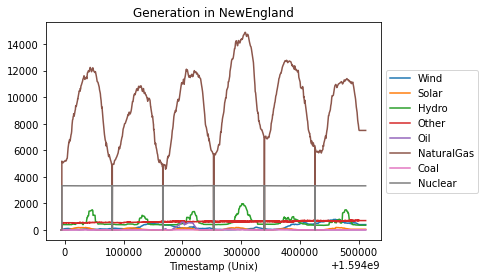

In [ ]:
# # Line Chart ( Trend during the day)
weekplot = df.plot.line(x='Timestamp (Unix)',
                y = ['Wind', 'Solar', 'Hydro', 'Other', 'Oil', 'NaturalGas', 'Coal', 'Nuclear'],
                    title = "Generation in "+ Region)
weekplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Daily chart for the week by MINUTES_PASS

2020-07-06
2020-07-07
2020-07-08
2020-07-09
2020-07-10
2020-07-11


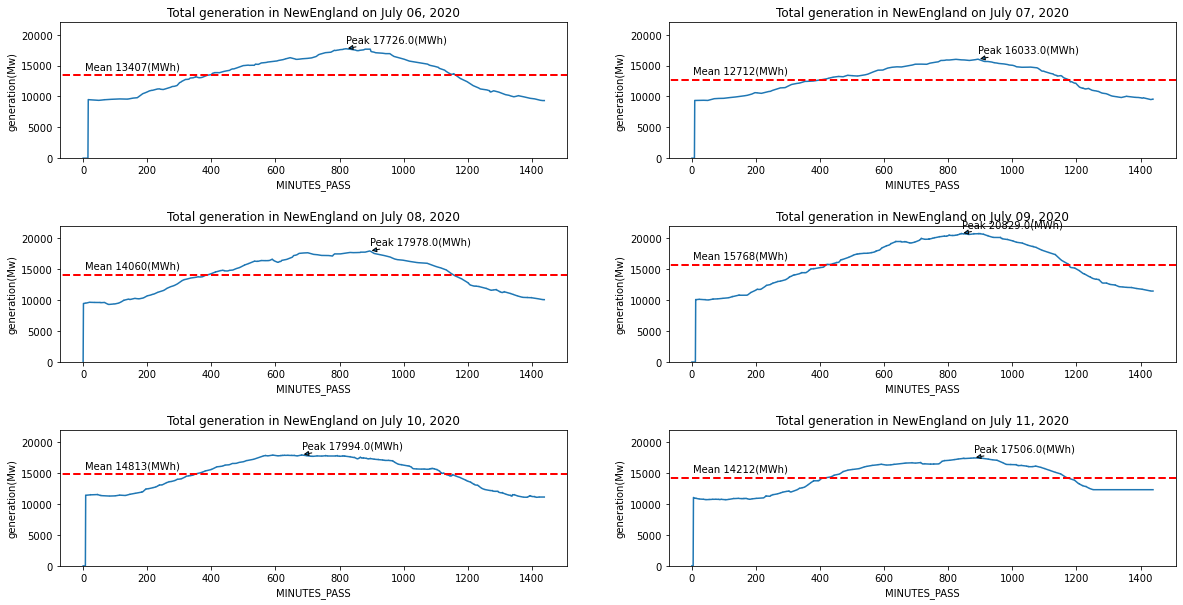

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(20, 10)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

for pp,ax in zip(dates,axs.flatten()):
#     print(df_nw[pp])
    print(pp)
    sub_df=df[df['DATE']==pp]
    sub_df.plot(x='MINUTES_PASS', y=["total_generation"], ax = ax, title = "Total generation in "+ Region + " on "+ pp.strftime('%B %d, %Y'))
    
    ax.set_ylabel("generation(Mw)")
    
    mean_gen = round(sub_df["total_generation"].mean())
    max_gen = sub_df["total_generation"].max()
    maxh = sub_df.loc[sub_df["total_generation"]== max_gen]
    maxh = maxh["MINUTES_PASS"]
    ax.axhline(y=mean_gen, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)
    
    ax.text(5,mean_gen+1000, "Mean " + str(mean_gen) + "(MWh)" )
    
    ax.get_legend().remove()
    
    ax.annotate('Peak '+ str(max_gen)+ "(MWh)", xy=(maxh,max_gen), xytext=(maxh+1, max_gen+1000),
             arrowprops=dict(arrowstyle='-|>') ,ha='left', rotation=0)
    
    ax.set_ylim(bottom = 0,top=22000)

# ax.axhline(y=df_nw["total_generation"].median(), xmin=-1, xmax=1, color='g', linestyle='--', lw=2)

## Daily chart for the week as per fuel sources by MINUTES_PASS

2020-07-06
2020-07-07
2020-07-08
2020-07-09
2020-07-10
2020-07-11


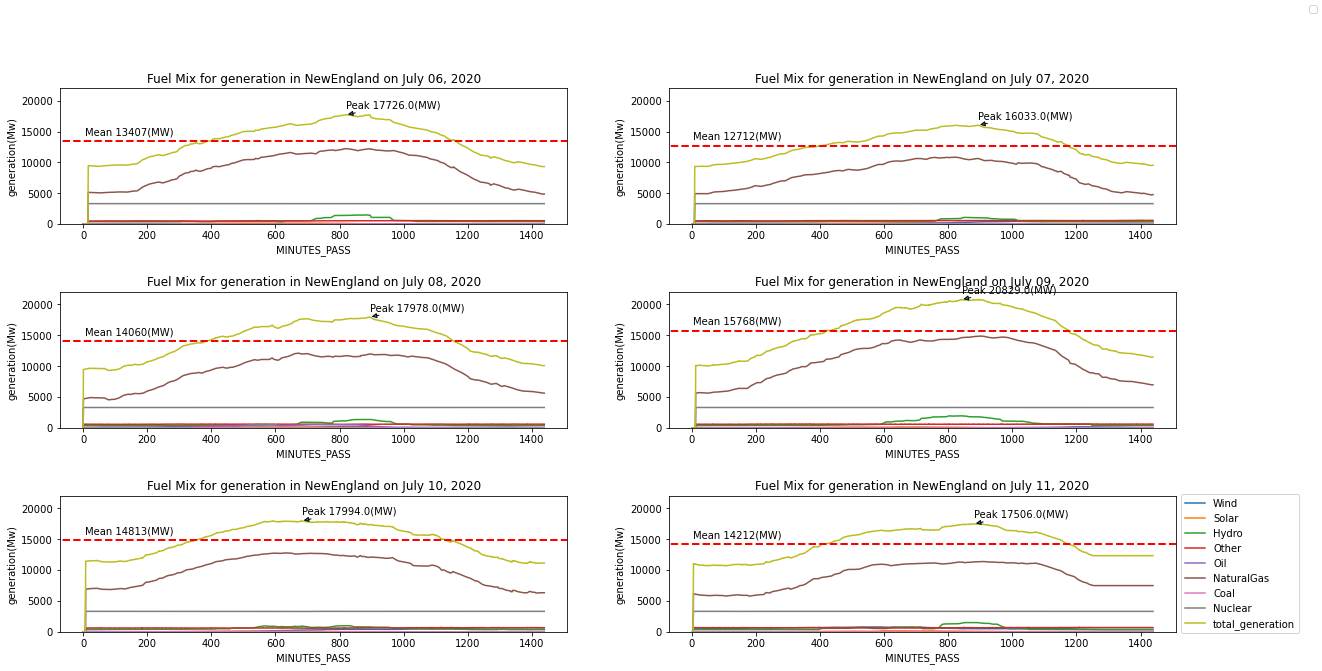

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(20, 10)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

fig.legend(column_list)
    
for pp,ax in zip(dates,axs.flatten()):
#     print(df_nw[pp])
    print(pp)
    sub_df = df[df['DATE']==pp]
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[0], ax = ax, title = "Fuel Mix for generation in "+ Region + " on "+ pp.strftime('%B %d, %Y'),legend=False)
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[1], ax = ax,legend=False)
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[2], ax = ax,legend=False)    
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[3], ax = ax,legend=False)
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[4], ax = ax,legend=False)
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[5], ax = ax,legend=False)
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[6], ax = ax,legend=False)
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[7], ax = ax,legend=False)
    sub_df.plot.line(x='MINUTES_PASS', y =['total_generation'], ax = ax,legend=False)
    
    ax.set_ylabel("generation(Mw)")
    
    mean_gen = round(sub_df["total_generation"].mean())
    max_gen = sub_df["total_generation"].max()
    maxh = sub_df.loc[sub_df["total_generation"]== max_gen]
    maxh = maxh["MINUTES_PASS"]
    ax.axhline(y=mean_gen, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)
    
    ax.text(5,mean_gen+1000, "Mean " + str(mean_gen) + "(MW)" )

#     ax.get_legend().remove()
    
    ax.annotate('Peak '+ str(max_gen)+ "(MW)", xy=(maxh,max_gen), xytext=(maxh+1, max_gen+1000),
             arrowprops=dict(arrowstyle='-|>') ,ha='left', rotation=0)
    
    ax.set_ylim(bottom = 0,top=22000)
    
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
# usage in one day 
# df_nw.plot(x='HOURS',  kind='hist')

# df_nw.plot(x='HOURS', y=["Wind Generation (MWh)","Solar Generation (MWh)","Hydro Generation (MWh)","Other Generation (MWh)", 
#                         "Petroleum Generation (MWh)", "Natural gas Generation (MWh)","Coal Generation (MWh)","Nuclear Generation (MWh)"], kind='hist')

### Peak Minute

In [ ]:
## Peak Minute
peakmin = df[df["total_generation"] == df["total_generation"].max()]
peakmin = peakmin.reset_index(drop=True)
peakmin

,NaturalGas,Nuclear,Hydro,Coal,Oil,Wind,Solar,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS,total_generation,Timestamp (Unix),total_generation(W)
0,14636.0,3322.0,1975.0,16.0,48.0,47.0,127.0,658,2020-07-09 14:01:00,2020-07-09,14:01:00,14,1,841,20829.0,1594303260,2.082900e+10


### Peak Hour

In [ ]:
## Peak Hour
# df_nw= df_nw[df_nw["DATE"].astype(str) == Date]
peakhour = df[(df['HOURS'].values == peakmin.HOURS.values) & (df["DATE"].values == peakmin.DATE.values) ]
peakhour

,NaturalGas,Nuclear,Hydro,Coal,Oil,Wind,Solar,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS,total_generation,Timestamp (Unix),total_generation(W)
891,14616.600000,3322.400000,1973.800000,16.000000,49.800000,46.600000,128.600000,615,2020-07-09 14:00:00,2020-07-09,14:00:00,14,0,840,20768.800000,1594303200,2.076880e+10
30,14636.000000,3322.000000,1975.000000,16.000000,48.000000,47.000000,127.000000,658,2020-07-09 14:01:00,2020-07-09,14:01:00,14,1,841,20829.000000,1594303260,2.082900e+10
892,14638.285714,3322.285714,1970.142857,15.142857,46.428571,46.142857,126.571429,615,2020-07-09 14:02:00,2020-07-09,14:02:00,14,2,842,20780.000000,1594303320,2.078000e+10
893,14640.571429,3322.571429,1965.285714,14.285714,44.857143,45.285714,126.142857,615,2020-07-09 14:03:00,2020-07-09,14:03:00,14,3,843,20774.000000,1594303380,2.077400e+10
894,14642.857143,3322.857143,1960.428571,13.428571,43.285714,44.428571,125.714286,615,2020-07-09 14:04:00,2020-07-09,14:04:00,14,4,844,20768.000000,1594303440,2.076800e+10
895,14645.142857,3323.142857,1955.571429,12.571429,41.714286,43.571429,125.285714,614,2020-07-09 14:05:00,2020-07-09,14:05:00,14,5,845,20761.000000,1594303500,2.076100e+10
896,14647.428571,3323.428571,1950.714286,11.714286,40.142857,42.714286,124.857143,614,2020-07-09 14:06:00,2020-07-09,14:06:00,14,6,846,20755.000000,1594303560,2.075500e+10
897,14649.714286,3323.714286,1945.857143,10.857143,38.571429,41.857143,124.428571,614,2020-07-09 14:07:00,2020-07-09,14:07:00,14,7,847,20749.000000,1594303620,2.074900e+10
47,14652.000000,3324.000000,1941.000000,10.000000,37.000000,41.000000,124.000000,657,2020-07-09 14:08:00,2020-07-09,14:08:00,14,8,848,20786.000000,1594303680,2.078600e+10
898,14657.857143,3324.000000,1941.142857,10.142857,34.857143,40.857143,122.285714,615,2020-07-09 14:09:00,2020-07-09,14:09:00,14,9,849,20746.142857,1594303740,2.074614e+10


In [ ]:
## Average generation 
average = peakhour["total_generation"].mean()
average

20742.138333333332

Text(-0.4, 20742.138333333332, 'average')

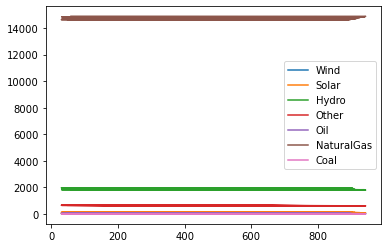

In [ ]:
peakhour.plot(y = ['Wind', 'Solar', 'Hydro', 'Other', 'Oil', 'NaturalGas', 'Coal'])
ax.hlines(23, -.5,.5, linestyles='dashed')
ax.annotate('average',(-0.4, average))

pick value in order off release fromm peakhour

## Transpose for working with one generation 

In [ ]:
# peakhour =  peakhour.iloc[: , column_list].copy()  
peakt =  peakmin[['Wind', 'Solar', 'Hydro', 'Other', 'Oil', 'NaturalGas', 'Coal', 'Nuclear']].transpose()

# # peakhourt=peakhour2.reindex(["Nuclear Generation (MW)", "Wind Generation (MW)", "Solar Generation (MW)","Hydro Generation (MW)" ,  
# #                          "Coal Generation (MW)", "Natural gas Generation (MW)","Petroleum Generation (MW)","Other Generation (MW)"])

for col in peakt.columns:
    peakt = peakt.rename(columns={col:'generation'})
    
peakt

,generation
Wind,47.0
Solar,127.0
Hydro,1975.0
Other,658.0
Oil,48.0
NaturalGas,14636.0
Coal,16.0
Nuclear,3322.0


In [ ]:
# pie chart Percentage for Contribution by fuel during peak hour
peakt["percent"] = (peakt['generation'] / peakt['generation'].sum()) * 100
peakt["percent"] = peakt["percent"].round(1)

# peakt = peakt.mask(peakhour2< 0, 0)
peakt

,generation,percent
Wind,47.0,0.2
Solar,127.0,0.6
Hydro,1975.0,9.5
Other,658.0,3.2
Oil,48.0,0.2
NaturalGas,14636.0,70.3
Coal,16.0,0.1
Nuclear,3322.0,15.9


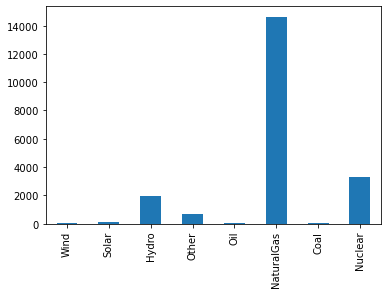

In [ ]:
peakt["generation"].plot.bar(stacked=True)

### PeaK Pie char Fuel Mix

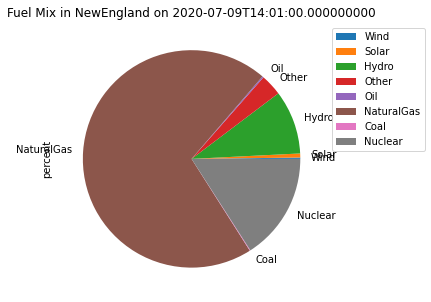

In [ ]:
pie_peak= peakt.plot.pie(y='percent',title="Fuel Mix in "+ Region + " on "+ str(peakmin.Timestamp.values[0]) , figsize=(5, 5))
pie_peak.legend(bbox_to_anchor=(1,1), loc="centre right")

In [ ]:
peakt = peakt.drop(columns='percent')

In [ ]:
# Cummulative_generation
# peakt['Cummulative_generation']  = peakt["generation"].cumsum()
# peakt

In [ ]:
# peakt.plot(x="Cummulative_generation")

In [ ]:
# draw graph for cummultaive consumption 
# peakhour2.plot("Cummulative_consumption")

# peakhour2.plot.bar(peakhour2["Cummulative_consumption"], drawstyle='steps')
# peakhour2.reset_index().plot.line(peakhour2["Cummulative_consumption"], peakhour2.index, drawstyle='steps')

<a id="section-five"></a>
# 5. Carbon Emission vs Fuel

Now merge dataset and look at data distributions and correlations for Co2 and fuel sources 

In [ ]:
df_carbon = pd.read_csv("../input/lcoe-co2/US Utility grids - LCOE Co2 Emissions - Carbon2.csv")
df_carbon

,Fuel Type,Life cycle CO2 equivalent ( kgCO2eq/MWh)
0,Nuclear,12
1,Solar,48
2,Other,24
3,Petroleum,490
4,Oil,490
5,Natural gas,490
6,NaturalGas,490
7,Coal,820
8,Hydro,0


In [ ]:
df_carbon.info()
df_carbon['Life cycle CO2 equivalent  ( kgCO2eq/MWh)']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Fuel Type                                  9 non-null      object
 1   Life cycle CO2 equivalent  ( kgCO2eq/MWh)  9 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 272.0+ bytes


0     12
1     48
2     24
3    490
4    490
5    490
6    490
7    820
8      0
Name: Life cycle CO2 equivalent  ( kgCO2eq/MWh), dtype: int64

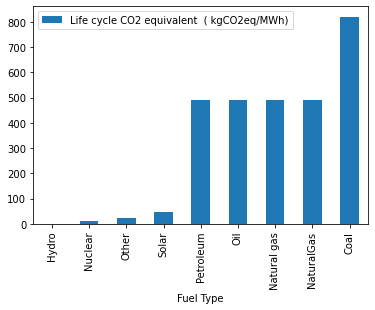

In [ ]:
df_carbon.sort_values('Life cycle CO2 equivalent  ( kgCO2eq/MWh)',ascending=True).plot( x='Fuel Type',kind='bar')

### Time vs consumption

In [ ]:
# for i, row in peakhour2.iterrows():
#     print(i)
            
# for j,lcoe in df_lcoe.iterrows():
#         print(lcoe.values[0])

peakt['carbon']=0
for i, row in peakt.iterrows():
    for j,carbon in df_carbon.iterrows():
        if i in carbon[0]:
            print("Match between two tables for "+i+ " and "+ carbon[0])
            generation=row[0]
            print(str(generation) + ' * '+ str(carbon[1]))
            peakt.at[i,'carbon'] = generation * carbon[1]
            
peakt

Match between two tables for Solar and Solar
127.0 * 48
Match between two tables for Hydro and Hydro
1975.0 * 0
Match between two tables for Other and Other
658.0 * 24
Match between two tables for Oil and Oil
48.0 * 490
Match between two tables for NaturalGas and NaturalGas
14636.0 * 490
Match between two tables for Coal and Coal
16.0 * 820
Match between two tables for Nuclear and Nuclear
3322.0 * 12


,generation,carbon
Wind,47.0,0
Solar,127.0,6096
Hydro,1975.0,0
Other,658.0,15792
Oil,48.0,23520
NaturalGas,14636.0,7171640
Coal,16.0,13120
Nuclear,3322.0,39864


In [ ]:
# sort by ascending order of carbon emission
peakt = peakt.sort_values(by=['carbon'])
peakt

,generation,carbon
Wind,47.0,0
Hydro,1975.0,0
Solar,127.0,6096
Coal,16.0,13120
Other,658.0,15792
Oil,48.0,23520
Nuclear,3322.0,39864
NaturalGas,14636.0,7171640


In [ ]:
# peakt["total_carbon(metric tons)"] = (peakt["generation"] * peakt["carbon"]) / 1000
# peakt

In [ ]:
# Cummulative_generation with respect to nw ordering of carbon 
peakt['Cummulative_generation']  = peakt["generation"].cumsum()
peakt

,generation,carbon,Cummulative_generation
Wind,47.0,0,47.0
Hydro,1975.0,0,2022.0
Solar,127.0,6096,2149.0
Coal,16.0,13120,2165.0
Other,658.0,15792,2823.0
Oil,48.0,23520,2871.0
Nuclear,3322.0,39864,6193.0
NaturalGas,14636.0,7171640,20829.0


In [ ]:
# Cummulative_carbon emission 
peakt['Cummulative_carbon(kg)']  = peakt["carbon"].cumsum()
peakt

,generation,carbon,Cummulative_generation,Cummulative_carbon(kg)
Wind,47.0,0,47.0,0
Hydro,1975.0,0,2022.0,0
Solar,127.0,6096,2149.0,6096
Coal,16.0,13120,2165.0,19216
Other,658.0,15792,2823.0,35008
Oil,48.0,23520,2871.0,58528
Nuclear,3322.0,39864,6193.0,98392
NaturalGas,14636.0,7171640,20829.0,7270032


In [ ]:
def def_plot_limity(ymax,ypos):
    if (ypos < ymax ):
        return ypos
    elif (ypos < 0 ):
        return 0
    return (ymax - (0.2*ymax))

def def_plot_limitx(xmax,xpos):
    if (xpos < xmax ):
        return xpos
    return xmax

In [ ]:
## standard plot consumption vs total carbon 
# carbonplot = peakt.plot(x="generation",y="carbon",grid=True, style='.-', 
#                             title='carbon vs consumption in '+ Region + " on " + str(peakmin.DATE.values) ,legend=True)
# carbonplot.set_xlabel("generation(MW)")
# carbonplot.set_ylabel("carbon(kg)")

# index=0
# colcount=len(peakt.columns)
# for i, row in peakt.iterrows():
#     index=index+1
#     generation = row.values[0]
#     carbon = row.values[1]
#     print(generation, carbon)
#     carbonplot.annotate(i, xy=(generation, carbon), 
#                         xytext=(generation+(colcount-index)*1000, carbon+(colcount-index)*220000),
#                         arrowprops=dict(arrowstyle='-|>') ,ha='left', rotation=45)

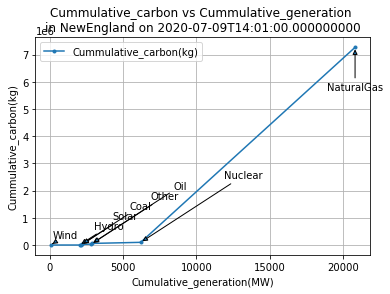

In [ ]:
## Cumulative plot 
carbonplot = peakt.plot(x="Cummulative_generation",y="Cummulative_carbon(kg)", 
                        title="Cummulative_carbon vs Cummulative_generation \n"+
                        "in "+ Region + " on " + str(peakmin.Timestamp.values[0]) ,
                        grid=True, style='.-', legend=True)
carbonplot.set_xlabel("Cumulative_generation(MW)")
carbonplot.set_ylabel("Cummulative_carbon(kg)")

xmax = peakt['Cummulative_generation'].max()
ymax = peakt['Cummulative_carbon(kg)'].max()
index=0
colcount=len(peakt.columns)

for i, row in peakt.iterrows():
    index = index+1
    x = row.values[2]
    y = row.values[3]
    xpos = def_plot_limitx(xmax, x+(index)*1000)
    ypos = def_plot_limity(ymax, y+(index)*350000)
    carbonplot.annotate(i, xy=(x, y), 
                         xytext=(xpos, ypos), ha='center', va='center',
                         arrowprops=dict(arrowstyle='-|>'), rotation=0)

In [ ]:

# cplot = peakhour3.plot(y="commulative_CO2 emissions",x="commulative_demand",grid=True, style='.-', 
#                             title='commulative_CO2 emissions vs commulative_demand',legend=True)
# cplot.set_xlabel("commulative_demand (kW) ")
# cplot.set_ylabel("commulative_CO2 emissions (kg/kWh)")

# index=0
# colcount=len(df.columns)
# for i, row in peakhour3.iterrows():
#     index=index+1
#     print(row.values[3])
#     tag= row.values[0], row.values[3], row.values[5]
#     cplot.annotate(tag, 
#                     xy=(row.values[3], row.values[5]), 
#                     xytext=(row.values[3]+(colcount-index), row.values[5]+(colcount-index)),
#                     arrowprops=dict(arrowstyle='-|>') ,ha='left', rotation=0)

<a id="section-six"></a>
# 6. Price vs Fuel Type
LCOE (Levelized Cost Of generating Electricity) - price per MWh
Now that we have a merged dataset we can take a closer look at data distributions and correlations.

In [ ]:
df_cost = pd.read_csv("../input/lcoe-co2/US Utility grids - LCOE Co2 Emissions - Price2.csv")
df_cost
## Data source : IPCC ANEX III Technology-specific Cost and Performance Parameters -2014
# Schlömer S., T. Bruckner, L. Fulton, E. Hertwich, A. McKinnon, D. Perczyk, J. Roy, R. Schaeffer, R. Sims, P. Smith, and R. Wiser,
# 2014: Annex III: Technology-specific cost and performance parameters. In: Climate Change 2014: Mitigation of Climate
# Change. Contribution of Working Group III to the Fifth Assessment Report of the Intergovernmental Panel on Climate
# Change [Edenhofer, O., R. Pichs-Madruga, Y. Sokona, E. Farahani, S. Kadner, K. Seyboth, A. Adler, I. Baum, S. Brunner, P.
# Eickemeier, B. Kriemann, J. Savolainen, S. Schlömer, C. von Stechow, T. Zwickel and J.C. Minx (eds.)]. Cambridge University
# Press, Cambridge, United Kingdom and New York, NY, USA.

,Fuel Type,LCOE / Marginal Cost ( with subsidy) ( $/Mwh),LCOE from IEA 2020 ($/MWh)
0,Nuclear,25.0,46.850
1,Wind,NaN,69.920
2,Solar,24.0,98.270
3,Other,9.0,83.935
4,Petroleum,34.0,57.660
5,Oil,34.0,57.660
6,Natural gas,23.0,57.660
7,NaturalGas,23.0,57.660
8,Coal,34.0,114.260
9,Hydro,NaN,97.950


In [ ]:
# df_cost['LCOE / Marginal Cost ( with subsidy)  ( $/Mwh)']
df_cost[['Fuel Type','LCOE from IEA 2020 ($/MWh) ']]

# df_cost.info()
## Data source : https://www.iea.org/articles/levelised-cost-of-electricity-calculator LCOE estimates from Projected Costs of Generating Electricity 2020

,Fuel Type,LCOE from IEA 2020 ($/MWh)
0,Nuclear,46.850
1,Wind,69.920
2,Solar,98.270
3,Other,83.935
4,Petroleum,57.660
5,Oil,57.660
6,Natural gas,57.660
7,NaturalGas,57.660
8,Coal,114.260
9,Hydro,97.950


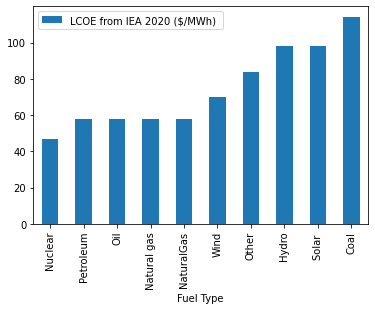

In [ ]:
df_cost.sort_values('LCOE from IEA 2020 ($/MWh) ',ascending=True).plot(x="Fuel Type",y='LCOE from IEA 2020 ($/MWh) ', kind='bar')
# df_cost.xticks(rotation=90)

IEA LCOE estimates from Projected Costs of Generating Electricity 2020

In [ ]:
# Assumptions 
# Discount rate 7% Central case
# Carbon price 30.00 USD/ton Default assumption
# Heat price 37.06 USD/MWh Default assumption
# Coal price 100% Default assumption
# Gas price 100% Default assumption

In [ ]:
peakt = peakt.drop(columns=['Cummulative_generation','carbon','Cummulative_carbon(kg)'])

In [ ]:
peakt['price']=0
for i, row in peakt.iterrows():
#     print(i)
    for j,cost in df_cost.iterrows():
#         print(lcoe.values[0])
        if i in cost[0]:
            print("Match between two tables for "+i+ " and "+ cost[0])
            print(cost.values[2])
            print(row.values[0])
            peakt.at[i,'price']= cost[2] * row[0]

peakt

Match between two tables for Wind and Wind
69.92
47.0
Match between two tables for Hydro and Hydro
97.95
1975.0
Match between two tables for Solar and Solar 
98.27
127.0
Match between two tables for Coal and Coal
114.26
16.0
Match between two tables for Other and Other
83.935
658.0
Match between two tables for Oil and Oil
57.66
48.0
Match between two tables for Nuclear and Nuclear
46.85
3322.0
Match between two tables for NaturalGas and NaturalGas
57.66
14636.0


,generation,price
Wind,47.0,3286
Hydro,1975.0,193451
Solar,127.0,12480
Coal,16.0,1828
Other,658.0,55229
Oil,48.0,2767
Nuclear,3322.0,155635
NaturalGas,14636.0,843911


In [ ]:
# sort by ascending order of price
peakt = peakt.sort_values(by=['price'])
peakt

,generation,price
Coal,16.0,1828
Oil,48.0,2767
Wind,47.0,3286
Solar,127.0,12480
Other,658.0,55229
Nuclear,3322.0,155635
Hydro,1975.0,193451
NaturalGas,14636.0,843911


In [ ]:
# Cummulative_generation with respect to nw ordering of cost 
peakt['Cummulative_generation']  = peakt["generation"].cumsum()
peakt

,generation,price,Cummulative_generation
Coal,16.0,1828,16.0
Oil,48.0,2767,64.0
Wind,47.0,3286,111.0
Solar,127.0,12480,238.0
Other,658.0,55229,896.0
Nuclear,3322.0,155635,4218.0
Hydro,1975.0,193451,6193.0
NaturalGas,14636.0,843911,20829.0


In [ ]:
# peakt["total_price($thousand)"] = (peakt["generation"] * peakt["price"]) / 1000
# peakt

In [ ]:
# Cummulative price
peakt['Cummulative_price($)']  = peakt["price"].cumsum()
peakt

,generation,price,Cummulative_generation,Cummulative_price($)
Coal,16.0,1828,16.0,1828
Oil,48.0,2767,64.0,4595
Wind,47.0,3286,111.0,7881
Solar,127.0,12480,238.0,20361
Other,658.0,55229,896.0,75590
Nuclear,3322.0,155635,4218.0,231225
Hydro,1975.0,193451,6193.0,424676
NaturalGas,14636.0,843911,20829.0,1268587


In [ ]:
# Plot price vs generation

# costplot = peakt.plot(y="price",x="generation",grid=True, style='.-', 
#                             title='price vs generation in ' + Region ,legend=True)
# costplot.set_xlabel("generation (MW) ")
# costplot.set_ylabel("Price LCOE ($/MWh)")

# index =0
# colcount=len(peakt.columns)
# for i, row in peakt.iterrows():
#     index=index+1
# #     print(row.values[6])
# #     costplot.text(row.values[2]+index*10, row.values[6]+index*30, str(i))
#     costplot.annotate(i, xy=(row.values[0], row.values[1]), 
#                         xytext=(row.values[0]+(colcount-index)*1000, row.values[1]+(colcount-index)*3000),
#                         arrowprops=dict(arrowstyle='-|>') ,ha='left', rotation=0)

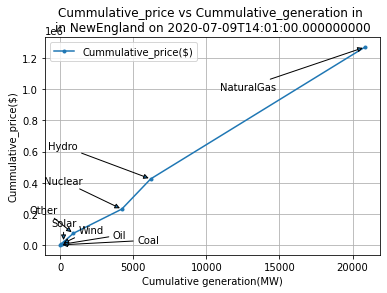

In [ ]:
# Plot Cummulative_price vs Cummulative_generation

costplot = peakt.plot(x="Cummulative_generation",y='Cummulative_price($)',
                            title="Cummulative_price vs Cummulative_generation in \n"+
                            "in "+ Region + " on " + str(peakmin.Timestamp.values[0]),
                            grid=True, style='.-', legend=True)
costplot.set_xlabel("Cumulative generation(MW)")
costplot.set_ylabel("Cummulative_price($)")

xmax = peakt['Cummulative_generation'].max()
ymax = peakt['Cummulative_price($)'].max()
index = 0
colcount=len(peakt.columns)
for i, row in peakt.iterrows():
    index=index+1
    x = row.values[2]
    y = row.values[3]
    xpos = def_plot_limitx(xmax, x+(colcount-index)*2000)
    ypos = def_plot_limity(ymax, y+(index)*30000)
    costplot.annotate(i, xy=(x, y), 
                        xytext=(xpos, ypos), ha='center', va='center',
                        arrowprops=dict(arrowstyle='-|>') , rotation=0)

<a id="section-seven"></a>
# 7. LMP Locational Marginal Pricing

In [ ]:
# Import all available data 
# df = pd.read_csv("../input/us-electricity-by-energy-source-in-spring/930-data-export.csv")

dfl = pd.read_csv("../input/lcoe-co2/lmp_Newengland_6_7_jul_2020.csv")
dfl2 = pd.read_csv("../input/lcoe-co2/lmp_Newengland_8_9_jul_2020.csv")
dfl3 = pd.read_csv("../input/lcoe-co2/lmp_Newengland_10_11_jul_2020.csv")

In [ ]:
dfl = dfl.append(dfl2)
dfl = dfl.append(dfl3)
len(dfl) 

1728

In [ ]:
dfl.head()

,BeginDate,ID,Energy,LMP,Loss,Congestion
0,07/05/2020 21:00,4000,16.47,16.49,0.02,0.0
1,07/05/2020 21:05,4000,16.47,16.49,0.02,0.0
2,07/05/2020 21:10,4000,15.81,15.83,0.02,0.0
3,07/05/2020 21:15,4000,15.81,15.83,0.02,0.0
4,07/05/2020 21:20,4000,17.30,17.33,0.03,0.0


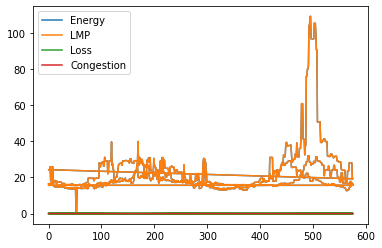

In [ ]:
dfl.plot(y=['Energy','LMP','Loss','Congestion'])

In [ ]:
dfl['Timestamp'] = pd.to_datetime(dfl['BeginDate'],format = '%d-%m-%Y %H:%M', errors='ignore')

# adding separate time and date columns
dfl["DATE"] = pd.to_datetime(dfl["Timestamp"]).dt.date # add new column with date
dfl["TIME"] = pd.to_datetime(dfl["Timestamp"]).dt.time # add new column with time

# add hours and minutes for ml models
dfl['HOURS'] = pd.to_datetime(dfl['TIME'],format='%H:%M:%S').dt.hour
dfl['MINUTES'] = pd.to_datetime(dfl['TIME'],format='%H:%M:%S').dt.minute
dfl['MINUTES_PASS'] = dfl['MINUTES'] + dfl['HOURS']*60


dates= dfl['DATE'].unique()

# remove first day which doesnt have all hours 
dates= dates[1:]

2020-07-06
2020-07-07
2020-07-08
2020-07-09
2020-07-10
2020-07-11


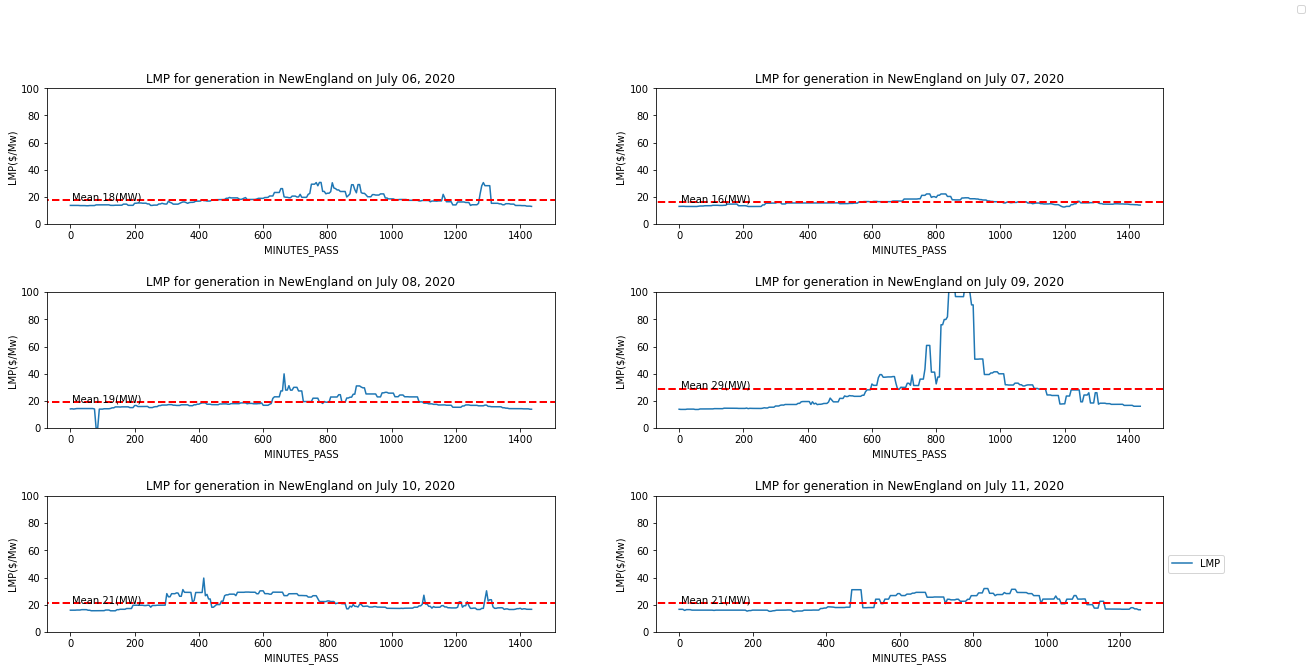

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(20, 10)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

fig.legend('LMP')

    
for pp,ax in zip(dates,axs.flatten()):
#     print(df_nw[pp])
    print(pp)
    sub_df = dfl[dfl['DATE']==pp]
    sub_df.plot(x='MINUTES_PASS', y = 'LMP', ax = ax, 
                title = "LMP for generation in "+ Region + " on "+ pp.strftime('%B %d, %Y'),
                legend=False)
    
    ax.set_ylabel("LMP($/Mw)")
    
    mean_lmp = round(sub_df["LMP"].mean())
#     max_gen = sub_df["LMP"].max()
#     maxh = sub_df.loc[sub_df["LMP"]== max_gen]
#     maxh = maxh["HOURS"]

    ax.axhline(y=mean_lmp, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)
    ax.text(5,mean_lmp, "Mean " + str(mean_lmp) + "(MW)" )

# #     ax.get_legend().remove()
    
#     ax.annotate('Peak '+ str(max_gen)+ "(MWh)", xy=(maxh,max_gen), xytext=(maxh+1, max_gen+1000),
#              arrowprops=dict(arrowstyle='-|>') ,ha='left', rotation=0)
    
    ax.set_ylim(bottom = 0,top=100)
    
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))